In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import re


C:\Users\tamar\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
dataframe = pd.read_csv('matala2_cosmetics_2019-Nov.csv', low_memory=False)
dataframe

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
...,...,...,...,...,...,...,...,...,...
4635832,2019-11-30 23:59:46 UTC,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295
4635833,2019-11-30 23:59:47 UTC,view,5733064,1487580004832248652,NaN,beautix,9.37,422196217,ab5e6dd5-8700-4ecc-a300-9f1eca5d1a95
4635834,2019-11-30 23:59:47 UTC,view,5867785,1487580007835370453,NaN,kims,31.1,572579084,d42865b7-7e04-4038-9be0-a59165625f06
4635835,2019-11-30 23:59:57 UTC,view,5779406,2151191071051219817,NaN,NaN,2.86,540006764,d4b5aa49-d731-40f1-92f1-277416d6e063


# Q1

In [3]:
data_Q1 = dataframe

data_Q1["event_time"] = pd.to_datetime(data_Q1["event_time"])
data_Q1 = data_Q1.sort_values(["user_id", "user_session", "event_time"])
data_Q1["duration_to_next_event"] = data_Q1.groupby(["user_id", "user_session"])["event_time"].diff().dt.seconds

data_Q1.loc[data_Q1.groupby(["user_id", "user_session"])["event_time"].tail(1).index, "duration_to_next_event"] = 0

data_Q1



,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
437209,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0
2494623,2019-11-19 11:14:48+00:00,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0.0
2640971,2019-11-20 11:58:06+00:00,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,NaN
2641003,2019-11-20 11:58:27+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,21.0
2641209,2019-11-20 11:59:39+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,72.0
...,...,...,...,...,...,...,...,...,...,...
4635733,2019-11-30 23:56:14+00:00,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,14.0
4635736,2019-11-30 23:56:17+00:00,view,5900651,1487580013950664926,NaN,NaN,19.52,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,3.0
4635737,2019-11-30 23:56:21+00:00,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0.0
4635752,2019-11-30 23:56:46+00:00,view,5790563,1487580008263189483,NaN,NaN,7.14,579968937,878af093-7570-48ae-966c-d50ce61e390c,0.0


# Q2

In [4]:
data_Q2 = dataframe.groupby(["user_id"]).agg(
{
    "event_time": lambda x: list(x),

}).reset_index()
    
data_Q2.columns = ["user_id","event_time"]

data_Q2['event_time'] = pd.to_datetime(data_Q2["event_time"].apply(lambda x: x[0]))

data_Q2 = data_Q2.sort_values(["user_id", "event_time"])

group = data_Q2.groupby("user_id")

# calculate the time difference between consecutive visits for each user
time_difference = group["event_time"].diff().fillna(pd.Timedelta(seconds=0))

# assign a panel number to each visit based on whether the time difference is greater than 5 days
panels = (time_difference > pd.Timedelta(days=5)).cumsum()

data_Q2["funnel_number"] = panels + 1

data_Q2

,user_id,event_time,funnel_number
0,1120748,2019-11-04 15:28:57+00:00,1
1,1458813,2019-11-19 09:56:09+00:00,1
2,5493470,2019-11-11 18:02:09+00:00,1
3,6217356,2019-11-22 12:39:43+00:00,1
4,8072106,2019-11-29 11:13:02+00:00,1
...,...,...,...
368227,579967088,2019-11-30 23:50:13+00:00,1
368228,579968012,2019-11-30 23:53:24+00:00,1
368229,579968623,2019-11-30 23:55:43+00:00,1
368230,579968937,2019-11-30 23:56:46+00:00,1


# Q3

In [5]:
data_Q3 = data_Q2

data_Q3["event_time"] = pd.to_datetime(data_Q3["event_time"])

data_Q3 = data_Q3.sort_values(by=["user_id", "event_time"])

data_Q3["index_in_funnel"] = (data_Q3.groupby(["user_id"]).cumcount() + 1)

data_Q3

,user_id,event_time,funnel_number,index_in_funnel
0,1120748,2019-11-04 15:28:57+00:00,1,1
1,1458813,2019-11-19 09:56:09+00:00,1,1
2,5493470,2019-11-11 18:02:09+00:00,1,1
3,6217356,2019-11-22 12:39:43+00:00,1,1
4,8072106,2019-11-29 11:13:02+00:00,1,1
...,...,...,...,...
368227,579967088,2019-11-30 23:50:13+00:00,1,1
368228,579968012,2019-11-30 23:53:24+00:00,1,1
368229,579968623,2019-11-30 23:55:43+00:00,1,1
368230,579968937,2019-11-30 23:56:46+00:00,1,1


# Q4

In [6]:
data_Q4 = dataframe

# Define a regular expression to extract the price
regex = r"^\d+\.\d+"

def extract_price(price_string):
    match = re.search(regex, price_string)
    if match:
        return float(match.group())
    else:
        return None

data_Q4["price"] = data_Q4["price"].apply(extract_price)

data_Q4

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02+00:00,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09+00:00,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10+00:00,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11+00:00,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24+00:00,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
...,...,...,...,...,...,...,...,...,...
4635832,2019-11-30 23:59:46+00:00,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295
4635833,2019-11-30 23:59:47+00:00,view,5733064,1487580004832248652,NaN,beautix,9.37,422196217,ab5e6dd5-8700-4ecc-a300-9f1eca5d1a95
4635834,2019-11-30 23:59:47+00:00,view,5867785,1487580007835370453,NaN,kims,31.10,572579084,d42865b7-7e04-4038-9be0-a59165625f06
4635835,2019-11-30 23:59:57+00:00,view,5779406,2151191071051219817,NaN,NaN,2.86,540006764,d4b5aa49-d731-40f1-92f1-277416d6e063


# Q5

In [9]:
data_Q5 = dataframe
data_Q5 = data_Q5[["user_id","event_type"]].groupby(["event_type"]).count()
data_Q5


,user_id
event_type,
cart,1311807
purchase,322417
remove_from_cart,925481
view,2076132


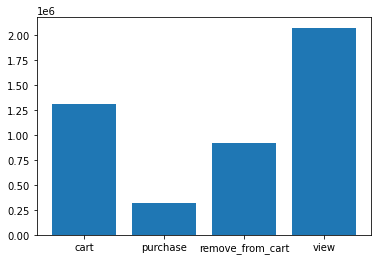

In [10]:
plot_Q5 = pd.DataFrame([["cart",1311807],["purchase",322417],["remove_from_cart",925481],["view",2076132]],
                     columns=["event_type","user_id"]) 

x = plot_Q5["event_type"]
y = plot_Q5["user_id"]
plt.bar(x,y)
plt.show()

# Q6

In [12]:
count_event_num = dataframe
count_event_num = count_event_num.rename(columns={"product_id": "NumOfEvents"})
count_event_num = count_event_num[["NumOfEvents","user_id","user_session"]].groupby(["user_id","user_session"]).count().reset_index()
count_event_num = count_event_num["NumOfEvents"]

count_total_time = dataframe
count_total_time = count_total_time.rename(columns={"product_id": "TotalTime"})
count_total_time = count_total_time[["TotalTime","user_id","user_session"]].groupby(["user_id","user_session"]).sum().reset_index()
count_total_time = count_total_time['TotalTime']

viewes = dataframe
viewes = viewes.groupby(["user_id"]).agg(
{
    "event_type": lambda x: list(x),

}).reset_index()
    
viewes.columns = ["user_id","list_of_viewed"]

added = dataframe
added = added.loc[(added["event_type"] == "cart")]
added = added["brand"]

purchased = dataframe
purchased = purchased.loc[(purchased["event_type"] == "purchase")]
purchased = purchased["brand"]

data_Q6 = dataframe
data_Q6 = data_Q6.drop(columns=["product_id","category_id","category_code","price","event_time","event_type","brand"]).copy()
data_Q6[["funnel_number","index_in_funnel"]] = data_Q3[["funnel_number","index_in_funnel"]]
data_Q6["NumOfEvents"] = count_event_num
data_Q6["TotalTime"] = count_total_time
data_Q6["list_of_viewed"] = viewes["list_of_viewed"]
data_Q6["list_of_added_to_cart"] = added
data_Q6["purchased_of_list"] = purchased

data_Q6

,user_id,user_session,funnel_number,index_in_funnel,NumOfEvents,TotalTime,list_of_viewed,list_of_added_to_cart,purchased_of_list
0,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,1.0,1.0,1.0,5240.0,[view],NaN,NaN
1,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,1.0,1.0,1.0,5814066.0,"[view, view, view, view, view, view, view, vie...",NaN,NaN
2,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f,1.0,1.0,28.0,161123469.0,"[view, cart, view, cart, cart, view, cart, vie...",NaN,NaN
3,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7,1.0,1.0,1.0,5711087.0,[cart],jessnail,NaN
4,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,1.0,1.0,1.0,5711145.0,[view],NaN,NaN
...,...,...,...,...,...,...,...,...,...
4635832,457678989,ee50b160-a4db-4722-8751-6812c5b38295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4635833,422196217,ab5e6dd5-8700-4ecc-a300-9f1eca5d1a95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4635834,572579084,d42865b7-7e04-4038-9be0-a59165625f06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4635835,540006764,d4b5aa49-d731-40f1-92f1-277416d6e063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
